<a href="https://colab.research.google.com/github/HamzaWajid1/House_price_prediction_Advanced/blob/main/House_Price_predice_using_advanced_regression_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import sys
import numpy as np
import seaborn as sns
from math import sqrt
from pylab import rcParams

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import StackingRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [21]:
#load dataSet
df_train=pd.read_csv("/content/train.csv",sep=',')
df_test=pd.read_csv("/content/test.csv",sep=',')

In [22]:
df_train.shape

(1460, 81)

In [23]:
df_test.shape

(1459, 80)

In [24]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [25]:
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [26]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [28]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<ipython-input-29-458d8496c9ed>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=df_train.corr()


Text(24.749999999999993, 0.5, 'Features')

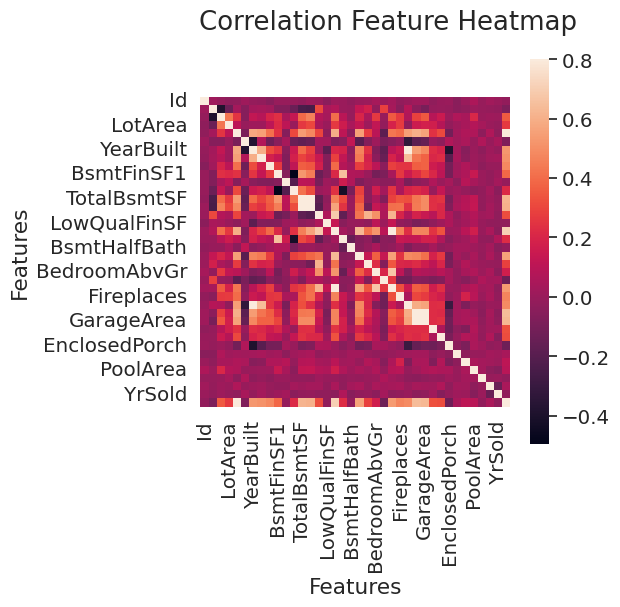

In [29]:
corr_mat=df_train.corr()
f,ax=plt.subplots()
sns.heatmap(corr_mat,vmax=0.8,square=True)
plt.suptitle("Correlation Feature Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")


<ipython-input-30-a08d6676d86b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=df_train.corr()


Text(99.74999999999999, 0.5, 'Features')

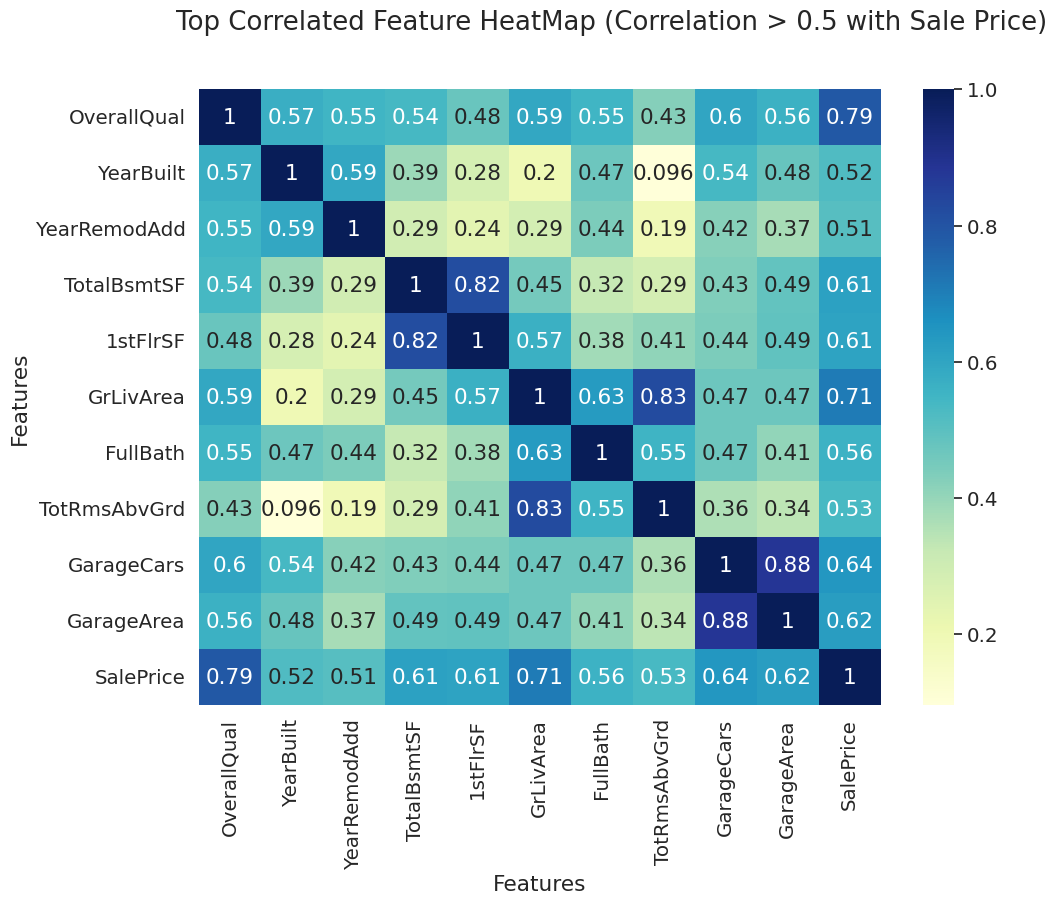

In [30]:
corr_mat=df_train.corr()
sns.set(font_scale=1.3)
plt.figure(figsize=(11,8))

top_corr=corr_mat.index[abs(corr_mat["SalePrice"])>0.5]
g=sns.heatmap(df_train[top_corr].corr(),annot=True,cmap="YlGnBu")
plt.suptitle("Top Correlated Feature HeatMap (Correlation > 0.5 with Sale Price)")
plt.xlabel("Features")
plt.ylabel("Features")

In [31]:
print("Correlation values")

corr=df_train.corr().drop('SalePrice')
corr.sort_values(["SalePrice"],ascending=False,inplace=True)
print(corr.SalePrice)

Correlation values
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dt

<ipython-input-31-3b35bb037ca7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_train.corr().drop('SalePrice')


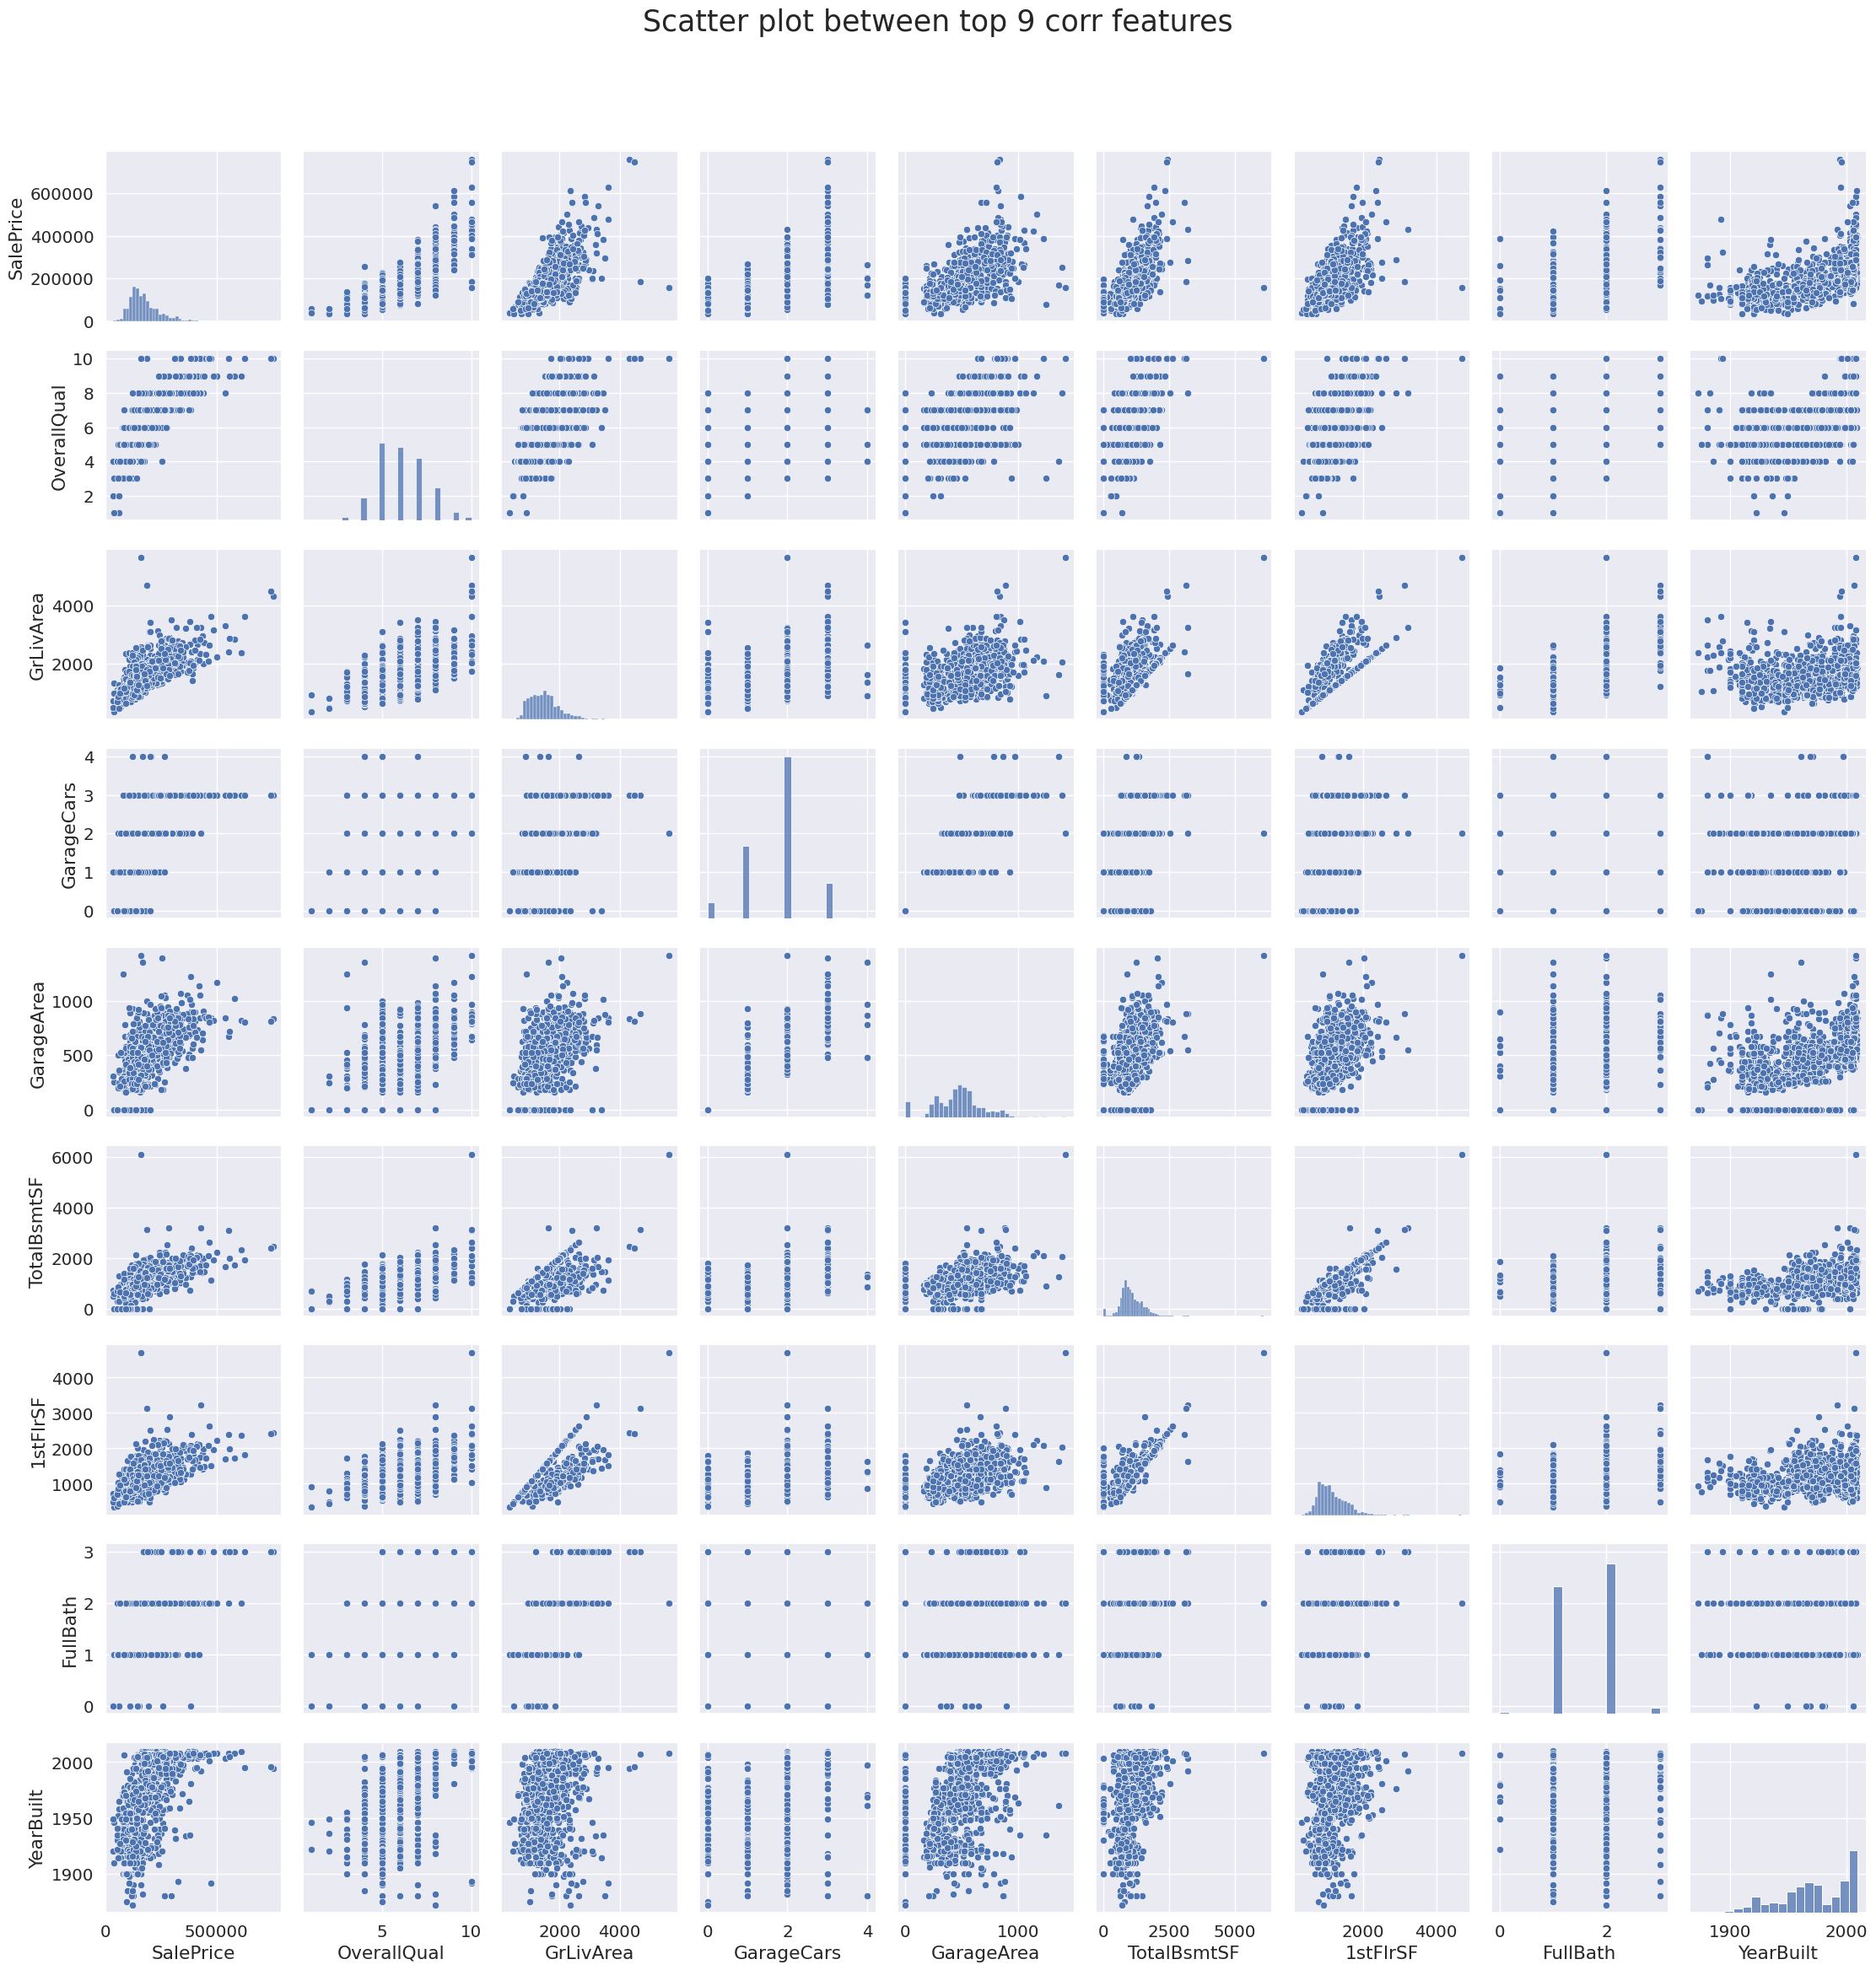

In [32]:
rcParams['figure.figsize']=5,5
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF','1stFlrSF','FullBath','YearBuilt']
sns_plot=sns.pairplot(df_train[cols])
plt.suptitle('Scatter plot between top 9 corr features',y=1.04,size=25)
plt.tight_layout()
plt.show()

Handling Data

In [33]:
df_train.drop(['Id'],axis=1,inplace=True)
df_test.drop(['Id'],axis=1,inplace=True)

df_train.shape,df_test.shape

(1459, 79)

In [34]:
sns.set_style('whitegrid')
edgecolor='black'

fig=plt.figure(figsize=(12,12))

def scatter_plot(a):
  fig,ax=plt.subplots()
  ax.scatter(x=df_train[a],y=df_train['SalePrice'],edgecolor=edgecolor)
  plt.ylabel('SalePrice', fontsize=12)
  plt.xlabel(a, fontsize=12)
  plt.suptitle("Scatter Plot of "+ a + " and SalePrice")
  plt.show()



<Figure size 1200x1200 with 0 Axes>

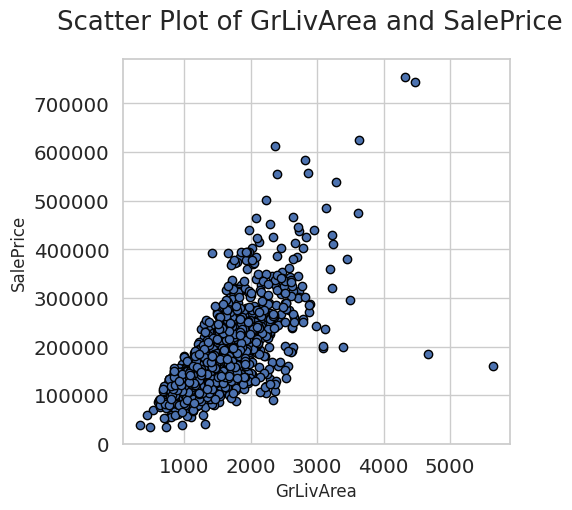

In [35]:
scatter_plot('GrLivArea')

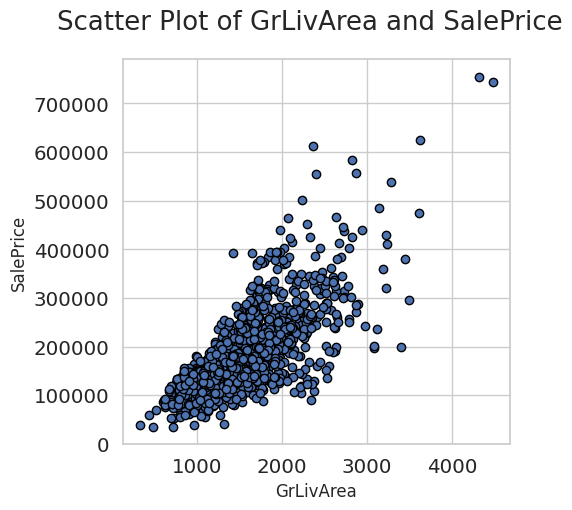

In [37]:
df_train=df_train.drop(df_train[(df_train['GrLivArea']>4000)&(df_train['SalePrice']<300000)].index)


#Check the graphic again
scatter_plot('GrLivArea')

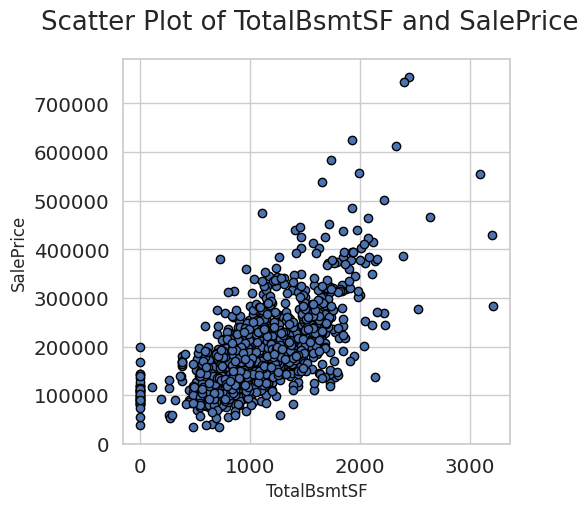

In [38]:
scatter_plot('TotalBsmtSF')

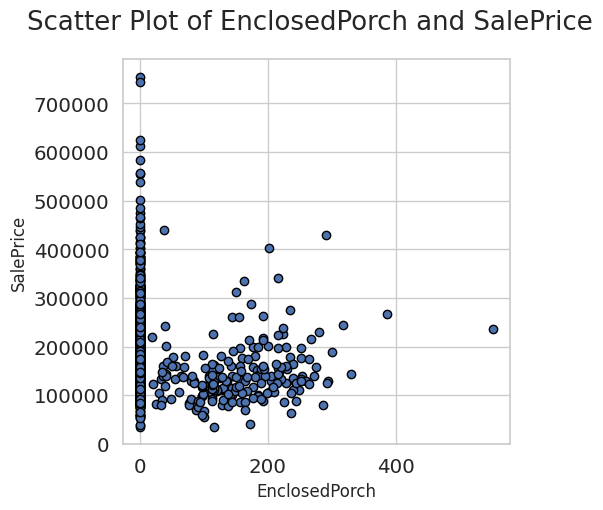

In [39]:
scatter_plot('EnclosedPorch')

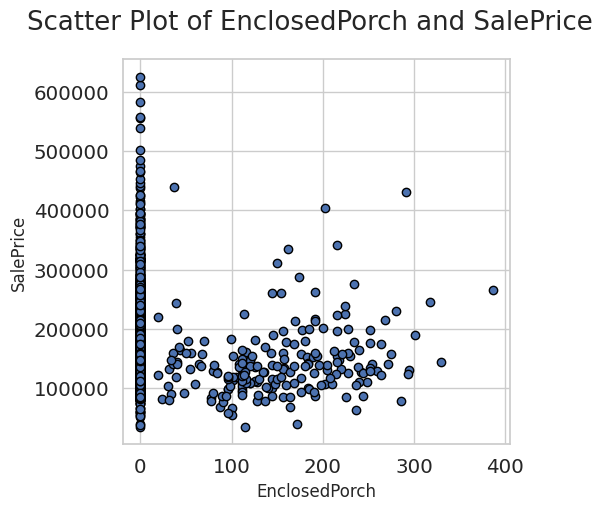

In [40]:


df_train=df_train.drop(df_train[(df_train['EnclosedPorch']>400)].index)
df_train=df_train.drop(df_train[(df_train['SalePrice']>700000)].index)

scatter_plot('EnclosedPorch')

In [ ]:
fig=plt.figure(figsize=(7,7))

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

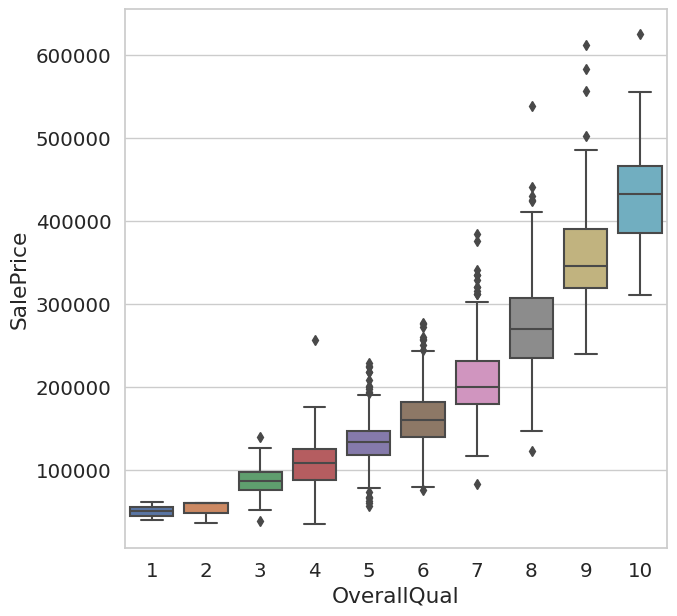

In [42]:
# plot a box plot for categorical feature : Overall Quality

fig=plt.figure(figsize=(7,7))
data=pd.concat([df_train['SalePrice'],df_train['OverallQual']],axis=1)
sns.boxplot(x=df_train['OverallQual'],y="SalePrice",data=data)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

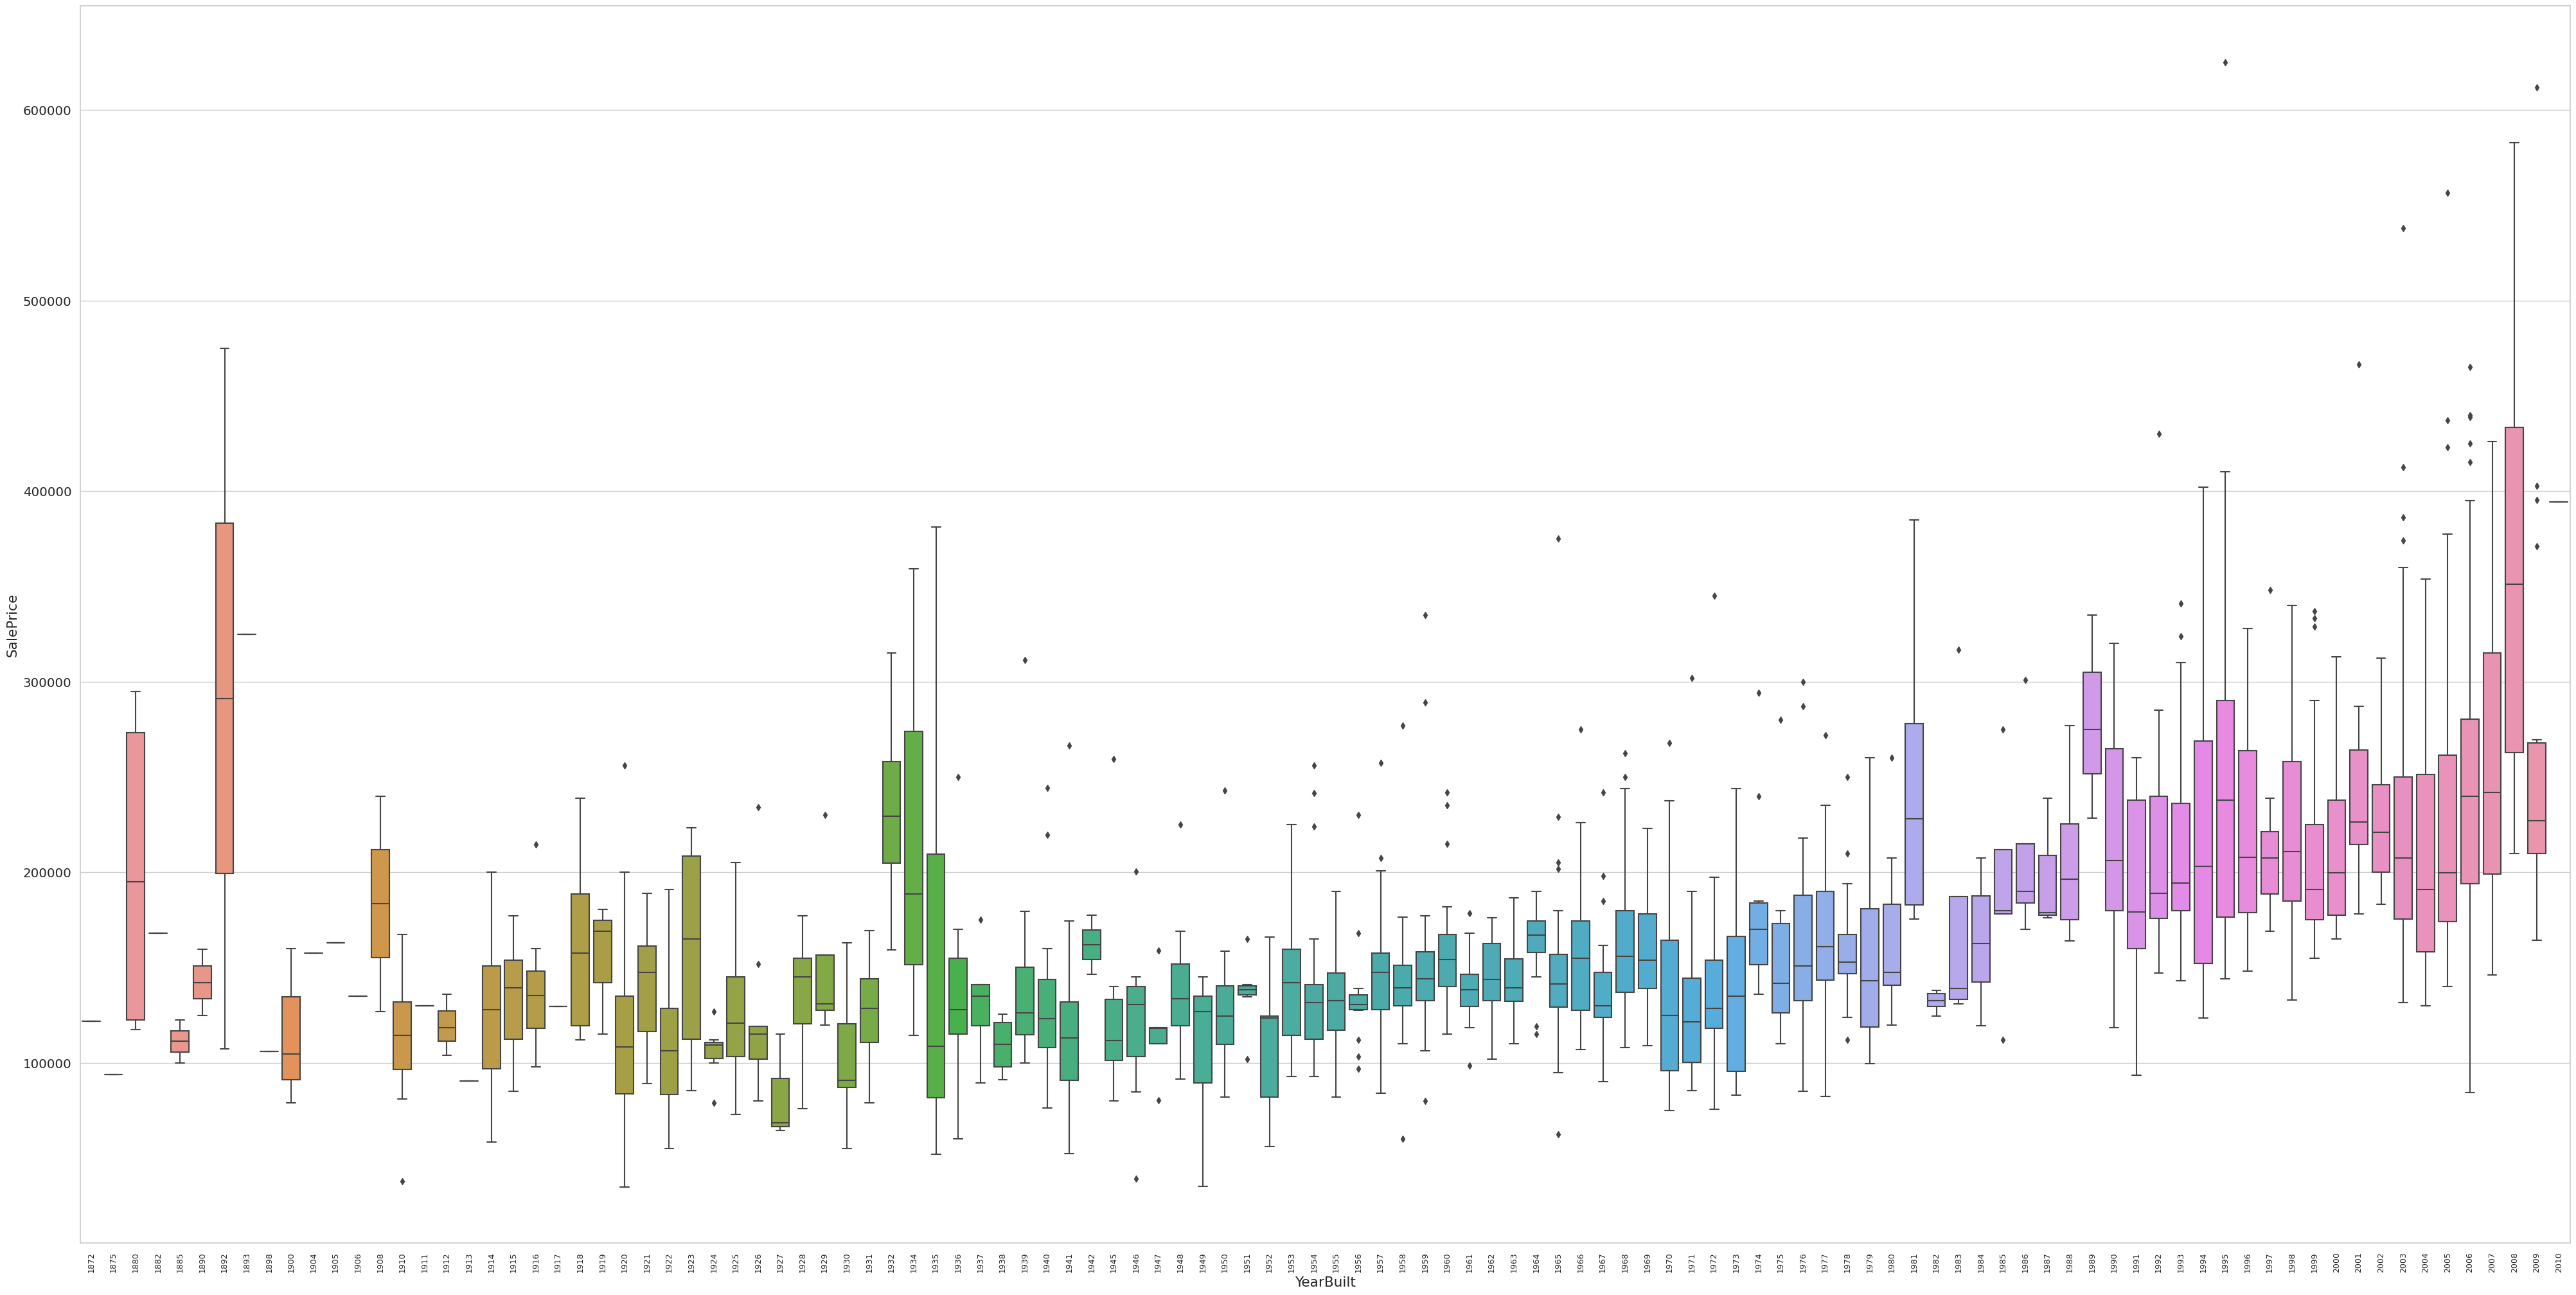

In [46]:
# plot a box plot for categorical feature : Year Built
fig=plt.figure(figsize=(50,25))
data=pd.concat([df_train['SalePrice'],df_train['YearBuilt']],axis=1)
sns.boxplot(x=df_train['YearBuilt'],y="SalePrice",data=data)
plt.xticks(rotation=90,fontsize=9)

<ipython-input-47-b2ceda9b7b41>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'])


Skewness: 1.567473
Kurtosis: 3.888317


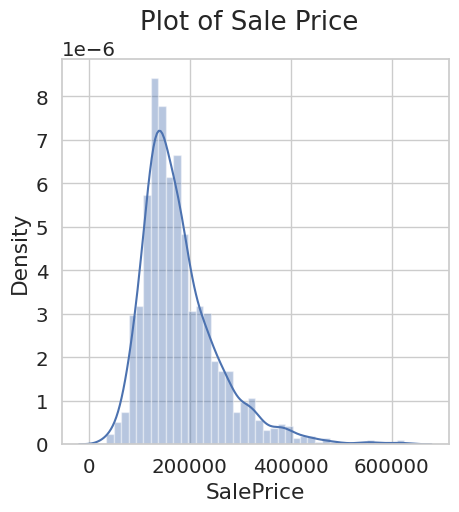

In [47]:
sns.distplot(df_train['SalePrice'])

plt.suptitle( "Plot of Sale Price")

print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

<ipython-input-48-e53c5ed4b2da>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'])


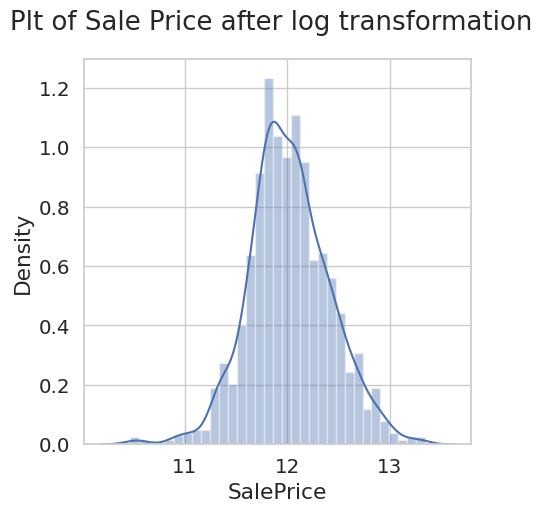

In [48]:
df_train['SalePrice']=np.log(df_train['SalePrice'])
plt.suptitle("Plt of Sale Price after log transformation")
sns.distplot(df_train['SalePrice'])
plt.show()

In [49]:
df_train['SalePrice'].describe()

count    1455.000000
mean       12.021706
std         0.396112
min        10.460242
25%        11.774520
50%        12.001505
75%        12.272562
max        13.345507
Name: SalePrice, dtype: float64

In [50]:
df_train['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1455, dtype: float64

In [51]:
df_train.shape

(1455, 80)

In [54]:
def missing_data(df,n):
  total=df.isna().sum().sort_values(ascending=False)
  percentage=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
  n_unique=df.nunique()
  missing_data=pd.concat([total,percentage,n_unique],axis=1,keys=['Total No of missing val','% of missing val','Number of unique vals'],sort=False)

  print(missing_data.head(n))

In [55]:
missing_data(df_train,20)

              Total No of missing val  % of missing val  Number of unique vals
PoolQC                           1451          0.997251                      2
MiscFeature                      1401          0.962887                      4
Alley                            1364          0.937457                      2
Fence                            1176          0.808247                      4
FireplaceQu                       690          0.474227                      5
LotFrontage                       259          0.178007                    109
GarageYrBlt                        81          0.055670                     97
GarageCond                         81          0.055670                      5
GarageType                         81          0.055670                      6
GarageFinish                       81          0.055670                      3
GarageQual                         81          0.055670                      5
BsmtExposure                       38          0.026

In [ ]:
df_train.drop(['PoolQC'],axis=1,inplace=True)

In [96]:
df_train.drop(['Utilities'],axis=1,inplace=True)

In [63]:
df_train.drop(['MiscFeature','Alley'],axis=1,inplace=True)

In [97]:
df_test.drop(['PoolQC'],axis=1,inplace=True)
df_test.drop(['Utilities'],axis=1,inplace=True)
df_test.drop(['MiscFeature','Alley'],axis=1,inplace=True)

In [67]:
missing_data(df_train,24)

              Total No of missing val  % of missing val  Number of unique vals
Fence                            1176          0.808247                      4
FireplaceQu                       690          0.474227                      5
LotFrontage                       259          0.178007                    109
GarageType                         81          0.055670                      6
GarageFinish                       81          0.055670                      3
GarageQual                         81          0.055670                      5
GarageCond                         81          0.055670                      5
GarageYrBlt                        81          0.055670                     97
BsmtFinType2                       38          0.026117                      6
BsmtExposure                       38          0.026117                      4
BsmtQual                           37          0.025430                      4
BsmtFinType1                       37          0.025

In [68]:
df_train['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [69]:
df_train['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79.,  99.,  67.,
        83.,  43., 103., 174.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106.,  42.,  39., 104., 144.,
       114., 128., 149., 313., 168., 182., 138., 152., 124., 153.,  46.])

In [70]:
df_train['LotFrontage'].describe()

count    1196.000000
mean       69.606187
std        22.865726
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [73]:
#df_train['Functional'].unique()
df_test['Functional'].isnull().sum()

2

In [82]:
#df_train['KitchenQual'].unique()
#df_test['KitchenQual'].isnull().sum()
df_test['KitchenQual'].mode()[0]

'TA'

In [84]:
#df_train['Electrical'].unique()
df_train['Electrical'].mode()[0]

'SBrkr'

In [87]:
df_train['SaleType'].mode()[0]

'WD'

In [89]:
df_train['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [93]:
#df_train['MSSubClass'].unique()
df_test['MSSubClass'].isnull().sum()

0

In [104]:
def missing(df):
  #df = df.drop(['Utilities','PoolQC','MiscFeature','Alley'], axis=1)
  df["Fence"]=df["Fence"].fillna("None")

  df["FireplaceQu"]=df["FireplaceQu"].fillna("None")
  df["LotFrontage"]=df["LotFrontage"].fillna(df["LotFrontage"].median())
  df["Functional"]=df["Functional"].fillna("Typ")
  df["KitchenQual"]=df["KitchenQual"].fillna(df["KitchenQual"].mode()[0])
  df["Electrical"]=df["Electrical"].fillna(df["Electrical"].mode()[0])
  df["SaleType"]=df["SaleType"].fillna(df["SaleType"].mode()[0])
  df["MasVnrType"] = df["MasVnrType"].fillna("None") #so fill as "None" (since categorical feature)
  df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
  df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
  df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
  df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
  df['MSSubClass'] = df['MSSubClass'].fillna("None")

  for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')
  for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)
  for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)
  for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

  return df


In [105]:
df_train = missing(df_train)
df_test = missing(df_test)

In [108]:
# calculate total number of null values in training data
null_train = df_train.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = df_test.isnull().sum().sum()
print(null_test)

0
0


In [109]:
df_train.shape,df_test.shape

((1455, 76), (1459, 75))

In [110]:
def add_nwe_cols(df):
  df['Total_Sf']=df['TotalBsmtSF']+df['1stFlrSF']+df['2ndFlrSF']
  df['Total_Bathrooms']=(df['FullBath']+(0.5*df['HalfBath'])+df['BsmtFullBath']+(0.5*df['BsmtHalfBath']))
  df['Total_Porch_SF']=(df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] +
                            df['ScreenPorch'] + df['WoodDeckSF'])
  df['Total_Square_Feet'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
  df['Total_Quality'] = df['OverallQual'] + df['OverallCond']
  return df

In [111]:
df_train = add_nwe_cols(df_train)
df_test = add_nwe_cols(df_test)

In [112]:
df_train.shape,df_test.shape

((1455, 81), (1459, 80))

In [113]:
g1 = df_train.columns.to_series().groupby(df_train.dtypes).groups

In [114]:
{k.name: v for k, v in g1.items()}

{'int64': Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'YrSold', 'Total_Sf', 'Total_Porch_SF',
        'Total_Square_Feet', 'Total_Quality'],
       dtype='object'),
 'float64': Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice',
        'Total_Bathrooms'],
       dtype='object'),
 'object': Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'MasVnrT

In [115]:
g2 = df_test.columns.to_series().groupby(df_test.dtypes).groups

In [116]:
{k.name: v for k, v in g2.items()}

{'int64': Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
        'Total_Porch_SF', 'Total_Quality'],
       dtype='object'),
 'float64': Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
        'GarageCars', 'GarageArea', 'Total_Sf', 'Total_Bathrooms',
        'Total_Square_Feet'],
       dtype='object'),
 'object': Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'MasVnrType', 'ExterQ